In [49]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [50]:
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [51]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs[:1000])

In [52]:
bert_df = topic_model.get_document_info(docs[:1000])

In [53]:
list_topic_id  = bert_df['Topic'].unique()

In [54]:
list_ = []
for i in bert_df['Topic']:
    content = " ".join(bert_df[bert_df['Topic'] == i]['Document'])
    list_.append(content)

In [55]:
def integrated_topics_content(bert_df, topic_id):
    s1 = bert_df[bert_df['Topic'] == topic_id]
    topic = s1['Topic'].tolist()[0]
    content = ' '.join(s1['Document'])
    topic_name = s1['Name'].tolist()[0]
    top_n_words = s1['Top_n_words'].tolist()[0]
    num_article = s1.shape[0]
    dict_ = {
        "topic": topic,
        "num_article": num_article,
        "top_n_words": top_n_words,
        "topic_name": topic_name,
        "content": content,
    }
    return dict_

In [56]:
bert_df

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,\n\nI am sure some bashers of Pens fans are pr...,1,1_the_to_and_in,the - to - and - in - he - of - that - is - bu...,1.00000,False
1,My brother is in the market for a high-perform...,0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False
2,\n\n\n\n\tFinally you said what you dream abou...,0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False
4,1) I have an old Jasmine drive which I cann...,0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False
...,...,...,...,...,...,...
995,\n\n\n\n\n\nHave you checked: 1/ The setting o...,0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False
996,"\n\n\n\nHumanist, or sub-humanist? :-)",0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,0.98044,False
997,\nI've had PRK.\n\nI would suggest asking a do...,0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False
998,"Actually, with several sharware utilities, you...",0,0_the_to_of_and,the - to - of - and - is - in - that - it - fo...,1.00000,False


In [57]:
bert_df['Topic'].value_counts()

Topic
0    875
1     93
2     32
Name: count, dtype: int64

In [58]:
pd.DataFrame([integrated_topics_content(bert_df, i) for i in bert_df['Topic'].unique()])

,topic,num_article,top_n_words,topic_name,content
0,1,93,the - to - and - in - he - of - that - is - bu...,1_the_to_and_in,\n\nI am sure some bashers of Pens fans are pr...
1,0,875,the - to - of - and - is - in - that - it - fo...,0_the_to_of_and,My brother is in the market for a high-perform...
2,2,32,testing - deletion - hello - was - - - - -...,2_testing_deletion_hello_was,\n... \n\n\n\n\n \n\n\n \n\n was...\...


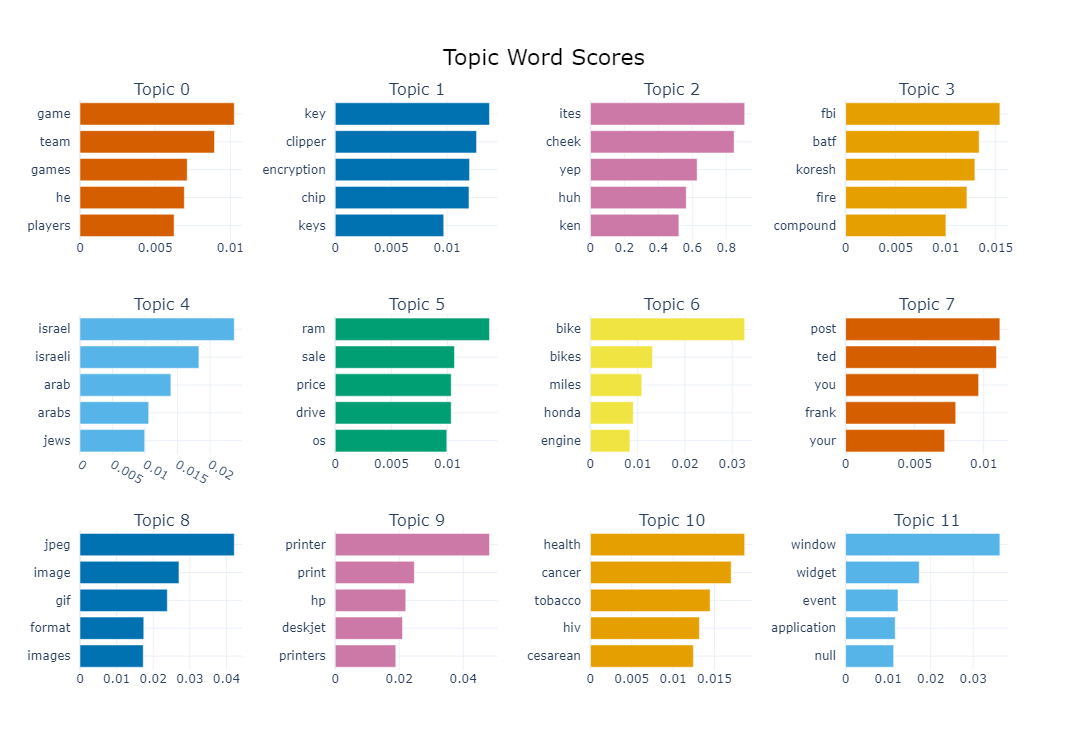

In [35]:
topic_model.visualize_barchart(top_n_topics=3)

# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(bert_df['Document'].tolist())
feature_names = vectorizer.get_feature_names_out()

In [ ]:
tfidf_list = []
for doc in range(len(bert_df['Document'])):
    articletfidfs = []
    feat_index = matrix[doc, :].nonzero()[1]
    for val in feat_index:
        name = feature_names[val]
        
        tfidf = matrix[doc, val]
        articletfidfs.append([name, tfidf])
    tfidf_list.append(articletfidfs)

In [143]:
def get_tf_idf_score(text):
    
    vectorizer = TfidfVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform([text])
    dict_ = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return dict_.to_dict('records')